<a href="https://colab.research.google.com/github/Taiba528/My-Python-World/blob/master/Ham_SpamCLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Here I am going to analyse the tweets whether its ham & spam.I am going to explore the data first with different tools (word frequency, and word cloud)

In [57]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import operator
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [9]:
# load dataset
from google.colab import files
uploaded = files.upload()

Saving SMS-Messages2.csv to SMS-Messages2.csv


In [0]:
df = pd.read_csv("SMS-Messages2.csv")

In [13]:
df.head()

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Message     200 non-null    object
 1   Class_Label  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [63]:
df.Class_Label.valueRa_counts()

AttributeError: ignored

Text(0.5, 1.0, 'Number of ham and spam messages')

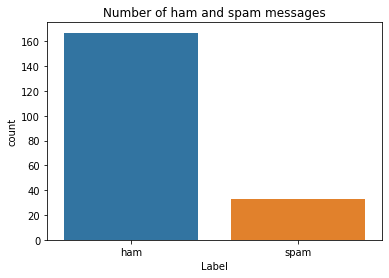

In [15]:
#Visualize the number of ham and spam messages
sns.countplot(df['Class_Label'])
plt.xlabel('Label')
plt.title('Number of ham and spam messages')



In [33]:
df_ham=df[df['Class_Label'] == 'ham']
df_spam=df[df['Class_Label']=='spam']
df_spam.head(2)


,Message,Class_Label
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
5,'FreeMsg Hey there darling it\'s been 3 week\'...,spam


In [0]:
Reviews_all=" ".join(review for review in df.Ratings_category)
Reviews_positive=" ".join(review for review in df_positive.Reviews)
Reviews_negative=" ".join(review for review in df_negative.Reviews)


In [45]:
Messages_all=" ".join(Message for Message in df.Class_Label)
Messages_ham=" ".join(Message for Message in df_ham.Message)
Messages_spam=" ".join(Message for Message in df_spam.Message)

AttributeError: ignored

In [0]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
fig, ax = plt.subplots(3, 1, figsize  = (20,20))
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Reviews_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Reviews_negative)
# Display the generated image:
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Reviews', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Reviews',fontsize=20)
ax[1].axis('off')

(-0.5, 399.5, 199.5, -0.5)

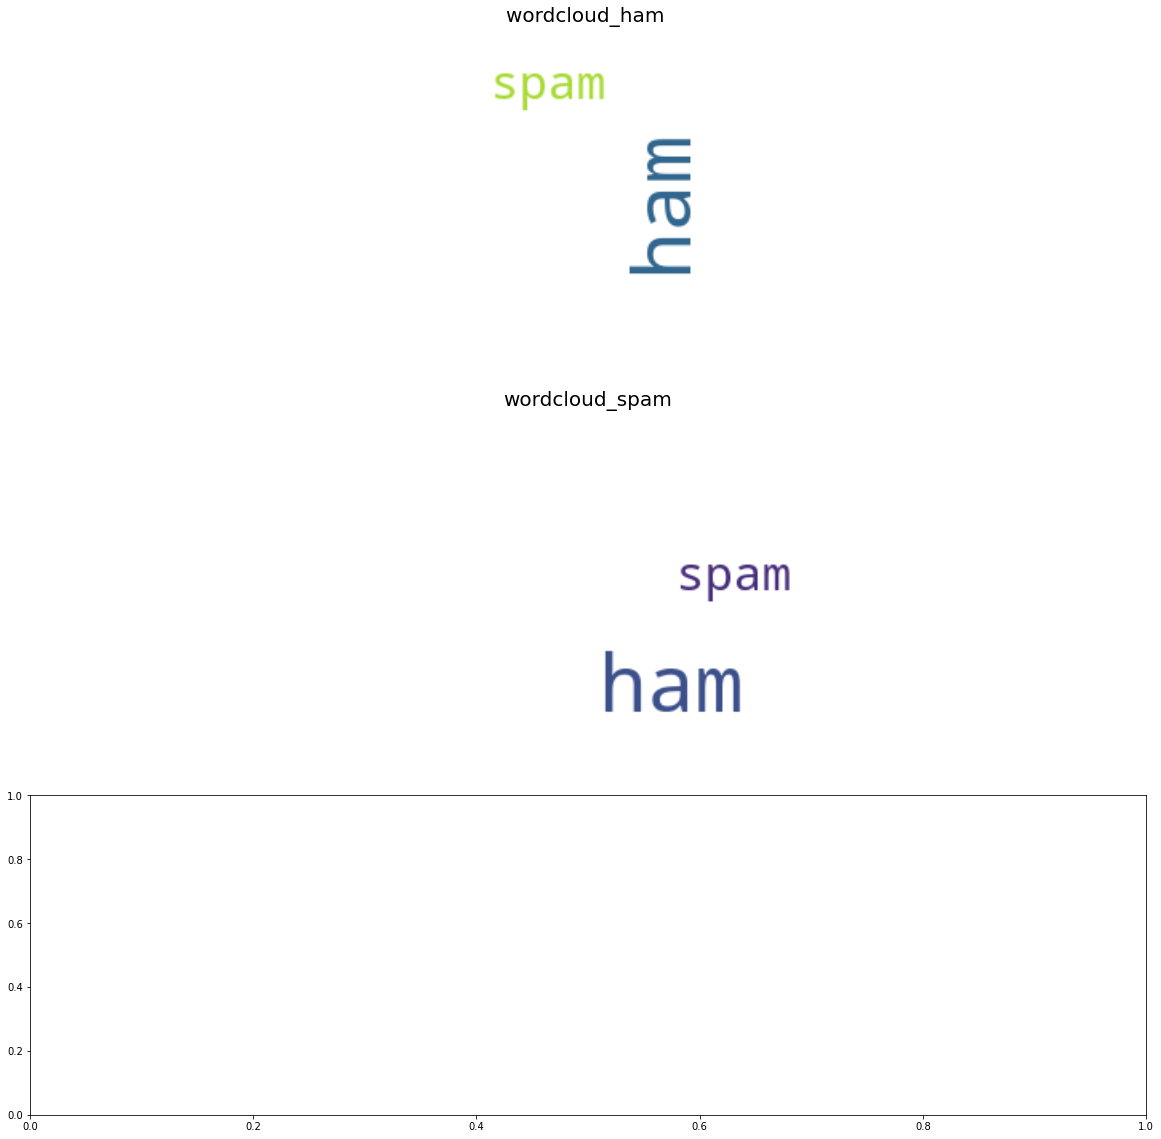

In [36]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
fig, ax = plt.subplots(3, 1, figsize  = (20,20))
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_ham = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Label_ham)
wordcloud_spam = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Label_spam)
# Display the generated image:
ax[0].imshow(wordcloud_ham, interpolation='bilinear')
ax[0].set_title('wordcloud_ham ', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_spam, interpolation='bilinear')
ax[1].set_title('wordcloud_spam',fontsize=20)
ax[1].axis('off')

In [0]:
X = df[' Message']
Y = df['Class_Label']
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

#Tokenization

# The first step in text analytics after reading the file is tokenization .It can be done at sentence level,word level or even character level.Here I am tokenizing it at word level.


In [53]:
X.head()

0                               'Go until jurong point
1                      'Ok lar... Joking wif u oni...'
2    'Free entry in 2 a wkly comp to win FA Cup fin...
3    'U dun say so early hor... U c already then sa...
4                   'Nah I don\'t think he goes to usf
Name:  Message, dtype: object

In [0]:
word_list = []

max = len(X)
for i in range (max):
  R1= X[i]
  tokens = R1.split()
  #print(tokens)
  words = []
  
  for token in tokens:
    words.append(token.lower())
  word_list.append(words) 
print(len(word_list))
word_list[0:5]

200


[["'go", 'until', 'jurong', 'point'],
 ["'ok", 'lar...', 'joking', 'wif', 'u', "oni...'"],
 ["'free",
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005.',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question(std',
  'txt',
  "rate)t&c\\'s",
  'apply',
  "08452810075over18\\'s'"],
 ["'u",
  'dun',
  'say',
  'so',
  'early',
  'hor...',
  'u',
  'c',
  'already',
  'then',
  "say...'"],
 ["'nah", 'i', "don\\'t", 'think', 'he', 'goes', 'to', 'usf']]

In [60]:
from google.colab import files
uploaded=files.upload()

Saving AFINN-111.csv to AFINN-111.csv


In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [62]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])

IndexError: ignored

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [0]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [0]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 112 samples, validate on 28 samples
Epoch 1/10
112/112 [==============================] - 1s 8ms/step - loss: 0.6948 - accuracy: 0.2589 - val_loss: 0.6774 - val_accuracy: 0.7857
Epoch 2/10
112/112 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.8304 - val_loss: 0.6537 - val_accuracy: 0.7857
Epoch 3/10
112/112 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.8304 - val_loss: 0.6000 - val_accuracy: 0.7857
Epoch 4/10
112/112 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8304 - val_loss: 0.4615 - val_accuracy: 0.7857
Epoch 5/10
112/112 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8304 - val_loss: 0.7203 - val_accuracy: 0.7857


In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
accr = model.evaluate(test_sequences_matrix,Y_test)

60/60 [==============================] - 0s 815us/step


In [0]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.473
  Accuracy: 0.867
